In [215]:
import  { makeBuffer } from "./src/testdata.ts";

const chart = Array.from(makeBuffer(200));
chart;


[
  709.2194213867188, 706.3933715820312,   710.74658203125, 722.9777221679688,
  735.3367919921875, 723.8336181640625, 729.6563110351562, 700.0557861328125,
  723.0510864257812, 737.4400024414062, 742.6436767578125, 752.0991821289062,
  756.8743286132812,           736.875, 731.7960815429688, 729.2026977539062,
  720.5260009765625, 726.9080200195312,     722.287109375,    740.6962890625,
  719.4588012695312,     727.904296875, 736.9266967773438, 746.5863037109375,
  738.5004272460938, 728.1513061523438, 740.0626831054688, 743.3286743164062,
   729.139892578125, 763.0739135742188, 756.0416870117188,  778.107177734375,
  770.4932250976562, 792.9940795898438,   794.86181640625, 797.6403198242188,
  802.9995727539062, 790.4274291992188,   780.49169921875,  770.798095703125,
  761.5438232421875, 764.0590209960938, 742.7406005859375, 716.8106079101562,
     712.2294921875, 703.0963134765625,  695.805419921875, 674.1373291015625,
  669.9010009765625, 662.8692016601562, 661.3986206054688,  66

In [216]:
import { std, regression } from "jsr:@sauber/statistics";

// Plot.lineY(chart, {x: "Date", y: "Close"}).plot({y: {grid: true}});

// const chart = [775, 794, 790, 803, 795, 793, 812, 800, 811, 823];
const reg = regression(chart);
const straight: number[] = chart.map((_, i) => reg.intercept + reg.gradiant * i);

const offset = Math.min(...chart)/2;
const lchart = chart.map(n=>Math.log(n-offset));
const lreg = regression(lchart);
const curved: number[] = chart.map((_, i) => offset + Math.exp(lreg.intercept + lreg.gradiant * i));

[reg, lreg, chart, straight, curved];

[
  { intercept: 719.1909398730834, gradiant: -1.0755956978376975 },
  { intercept: 6.170380710954718, gradiant: -0.0027448393491250676 },
  [
    709.2194213867188, 706.3933715820312,   710.74658203125, 722.9777221679688,
    735.3367919921875, 723.8336181640625, 729.6563110351562, 700.0557861328125,
    723.0510864257812, 737.4400024414062, 742.6436767578125, 752.0991821289062,
    756.8743286132812,           736.875, 731.7960815429688, 729.2026977539062,
    720.5260009765625, 726.9080200195312,     722.287109375,    740.6962890625,
    719.4588012695312,     727.904296875, 736.9266967773438, 746.5863037109375,
    738.5004272460938, 728.1513061523438, 740.0626831054688, 743.3286743164062,
     729.139892578125, 763.0739135742188, 756.0416870117188,  778.107177734375,
    770.4932250976562, 792.9940795898438,   794.86181640625, 797.6403198242188,
    802.9995727539062, 790.4274291992188,   780.49169921875,  770.798095703125,
    761.5438232421875, 764.0590209960938, 742.74060058593

In [217]:
const straightdev = std(chart.map((n, i) => n - straight[i]));
const curveddev = std(chart.map((n, i) => n - curved[i]));
[straightdev, curveddev];

[ 51.15820585918509, 49.16867807523826 ]

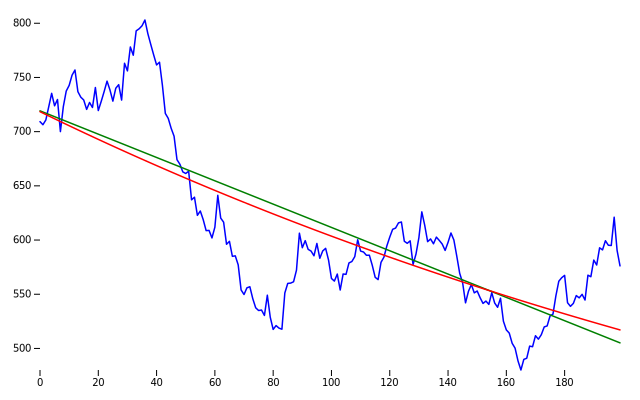

In [218]:
import Plot from "https://deno.land/x/plot/mod.ts";

Plot.plot({
  marks: [
    Plot.lineY(chart, {stroke: "blue"}),
    Plot.lineY(straight, {stroke: "green"}),
    Plot.lineY(curved, {stroke: "red"}),
  ]
});